### Import & Data load

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from tqdm import tqdm
import os

_dir = '_19'
_file_ls = os.listdir(_dir)
_file_ls

freez2 = pd.read_csv(os.path.join(_dir, _file_ls[3]))
suth2 = pd.read_csv(os.path.join(_dir, _file_ls[5]))
freez3 = pd.read_csv(os.path.join(_dir, _file_ls[-3]))
suth3 = pd.read_csv(os.path.join(_dir, _file_ls[-1]))

freez3.columns
freez3.columns = ['freezer_id', 'gw_time', 'status', 'fan_run', 'fan_trip',
       'freez_run', 'freez_trip', 'defrost', 'ctrl_mode', 'ctrl_operation',
       'operation', 'run_time', 'insert_dt']

suth3.columns
suth3.columns = ['sensor_id', 'gw_time', 'status', 'color_list', 'avg_temperature',
       'avg_humidity', 'temperature', 'humidity', 'battery', 'available',
       'insert_dt']

freez3.columns
freez3.columns = ['freezer_id', 'gw_time', 'status', 'fan_run', 'fan_trip',
       'freez_run', 'freez_trip', 'defrost', 'ctrl_mode', 'ctrl_operation',
       'operation', 'run_time', 'insert_dt']

suth3.columns
suth3.columns = ['sensor_id', 'gw_time', 'status', 'color_list', 'avg_temperature',
       'avg_humidity', 'temperature', 'humidity', 'battery', 'available',
       'insert_dt']


In [99]:
freez3

,freezer_id,gw_time,status,fan_run,fan_trip,freez_run,freez_trip,defrost,ctrl_mode,ctrl_operation,operation,run_time,insert_dt
0,61,2019-03-01 00:00:22,1,1,0,0,0,0,1,1,1,0,2019-03-01 00:00:22
1,61,2019-03-01 00:00:50,1,1,0,1,0,0,1,1,1,0,2019-03-01 00:00:50
2,61,2019-03-01 00:01:20,1,1,0,1,0,0,1,1,1,1,2019-03-01 00:01:20
3,61,2019-03-01 00:01:50,1,1,0,1,0,0,1,1,1,1,2019-03-01 00:01:50
4,61,2019-03-01 00:02:20,1,1,0,1,0,0,1,1,1,2,2019-03-01 00:02:20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2472055,491,2019-03-31 23:57:54,1,0,0,0,0,1,1,1,1,467,2019-03-31 23:57:54
2472056,491,2019-03-31 23:58:24,1,0,0,0,0,1,1,1,1,468,2019-03-31 23:58:24
2472057,491,2019-03-31 23:58:54,1,0,0,0,0,1,1,1,1,468,2019-03-31 23:58:54
2472058,491,2019-03-31 23:59:24,1,0,0,0,0,1,1,1,1,469,2019-03-31 23:59:24


In [100]:
# No. 16
sensor_id = [290, 293, 296, 299]
freezer_id = [308,314,320,326]

df_sensor = pd.DataFrame()
df_freezer = pd.DataFrame()

for elem in sensor_id:
    df_sensor = pd.concat([df_sensor, suth3[suth3['sensor_id'] == elem]])
    print("sensor id {}의 데이터 개수: {}".format(elem, len(suth3[suth3['sensor_id'] == elem])))
for elem in freezer_id:
    df_freezer = pd.concat([df_freezer, freez3[freez3['freezer_id'] == elem]])
    print("freezer id {}의 데이터 개수: {}".format(elem, len(df_freezer[df_freezer['freezer_id'] == elem])))


print(df_sensor['sensor_id'].unique())
print(df_freezer['freezer_id'].unique())

sensor id 290의 데이터 개수: 88756
sensor id 293의 데이터 개수: 88756
sensor id 296의 데이터 개수: 88754
sensor id 299의 데이터 개수: 88754
freezer id 308의 데이터 개수: 89527
freezer id 314의 데이터 개수: 89527
freezer id 320의 데이터 개수: 89527
freezer id 326의 데이터 개수: 89527
[290 293 296 299]
[308 314 320 326]


# 2월

### type 변환 및 sorting

In [101]:
df_freezer = df_freezer.sort_values(by = 'gw_time', ascending= True).reset_index(drop = True)
df_sensor = df_sensor.sort_values(by = 'gw_time', ascending= True).reset_index(drop = True)

df_freezer['gw_time'] = pd.to_datetime(df_freezer['gw_time'])
df_sensor['gw_time'] = pd.to_datetime(df_sensor['gw_time'])


# Column 별 데이터 확인
### 1. freezer -> 항상 가동 중일 가능성 있음
- freezer_id       : [308, 314, 320, 326]
- gw_time          : 2월 1일 ~ 2월 28일
- status           : 모든 id의 전 구간 값이 1 (범주형 변수로 예상, 추가적인 설명 필요함)
- fan_run          : 각 id의 fan 가동 여부(예상), 각 센서별 fan이 일정주기로 약 10분간 shutdown, 이외에는 항상 켜져있음
- fan_trip         : 모든 id의 전 구간 값이 0 
- freez_run        : 0,1의 범주형 변수로 냉각기 가동 여부(예상), 각 id별로 동작 다름, 326은 전 구간 0
- freez_trip       : 모든 id의 전 구간 값이 0
- defrost          : 사전적 의미는 '해동'으로, fan_run 변수와 상반되는 데이터, fan run이 0일 때, defrost는 1
- ctrl_mode        : 모든 id가 값이 같음, 2019-02-26 18:34:41 이전 0, 이후 1
- ctrl_operation   : 2019-02-26 이후 값에 변동 관찰 필요
- operation        : ctrl_operation와 전 구간 같은 데이터
- run_time         : 분(min) 데이터, 일별 0시~ 24시까지 선형 증가(0~1440), 2019-02-26 이후 변동 관찰 필요

### 2. sensor
- sensor_id        : [290, 293, 296, 299]
- gw_time          : 2월 1일 ~ 2월 28일
- status           : 0, 1, 2, 3의 범주형 변수
- color_list       : 온도, 습도의 상태를 3가지 범주형 변수로 표현 (수준에 따라 green, red, yellow)
- avg_temperature  : 평균 온도 (무엇을 평균 낸 것인지 잘 모르겠음)
- avg_humidity     : 평균 습도 (무엇을 평균 낸 것인지 잘 모르겠음)
- temperature      : 평균 온도와는 다른 값을 가지며 sensor 299는 값이 없음 
- humidity         : 평균 습도와는 다른 값을 가지며 sensor 299는 값이 없음 
- battery          : 배터리 잔량(예상), 90% 이상을 유지하는 중
- available        : 전 구간 1

sensor 299데이터는 없다고 봐야할 듯

### freezer에 따른 sensor별 온도 

In [102]:
df_sensor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355020 entries, 0 to 355019
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   sensor_id        355020 non-null  int64         
 1   gw_time          355020 non-null  datetime64[ns]
 2   status           355020 non-null  int64         
 3   color_list       355020 non-null  object        
 4   avg_temperature  355020 non-null  float64       
 5   avg_humidity     355020 non-null  float64       
 6   temperature      355020 non-null  float64       
 7   humidity         355020 non-null  float64       
 8   battery          355020 non-null  int64         
 9   available        355020 non-null  int64         
 10  insert_dt        355020 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(4), object(2)
memory usage: 29.8+ MB


In [103]:
df = df_freezer.sort_values(by = ['freezer_id', 'gw_time']).reset_index(drop = True)

<AxesSubplot: >

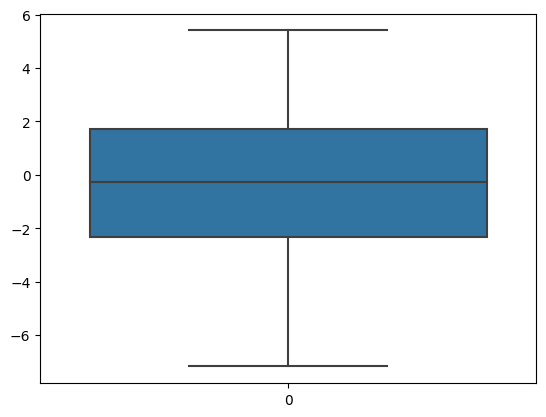

In [104]:
sns.boxplot(temp['temperature'])

C:\Users\Intellicode\AppData\Local\Temp\ipykernel_7864\2332207918.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


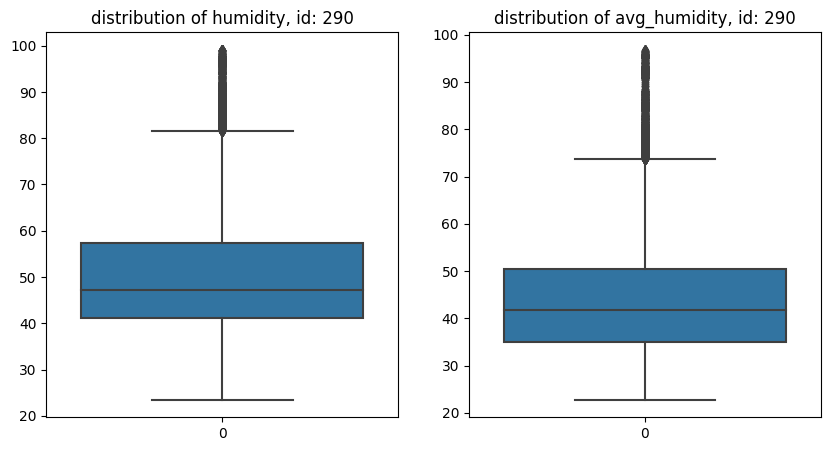

C:\Users\Intellicode\AppData\Local\Temp\ipykernel_7864\2332207918.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


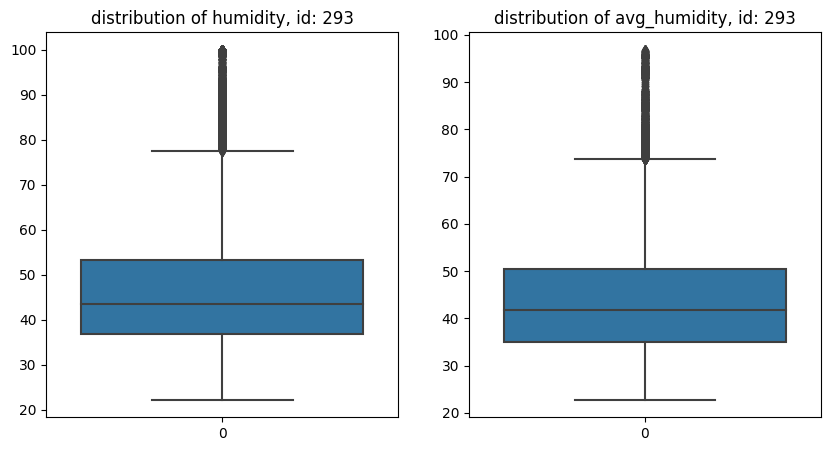

C:\Users\Intellicode\AppData\Local\Temp\ipykernel_7864\2332207918.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


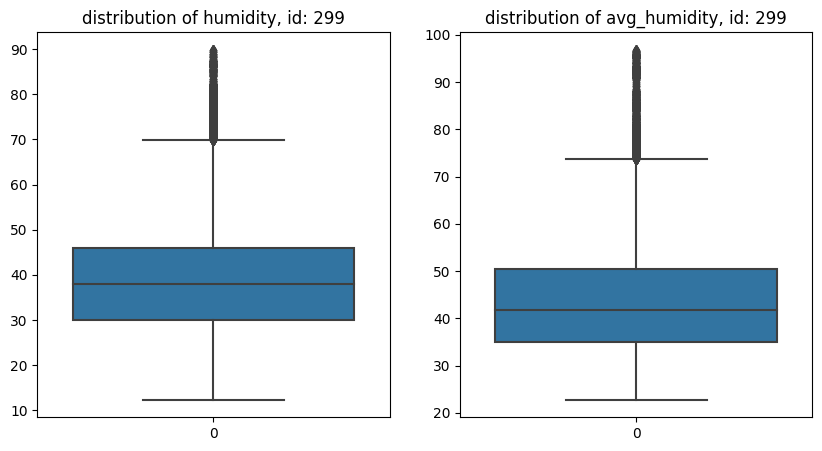

C:\Users\Intellicode\AppData\Local\Temp\ipykernel_7864\2332207918.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


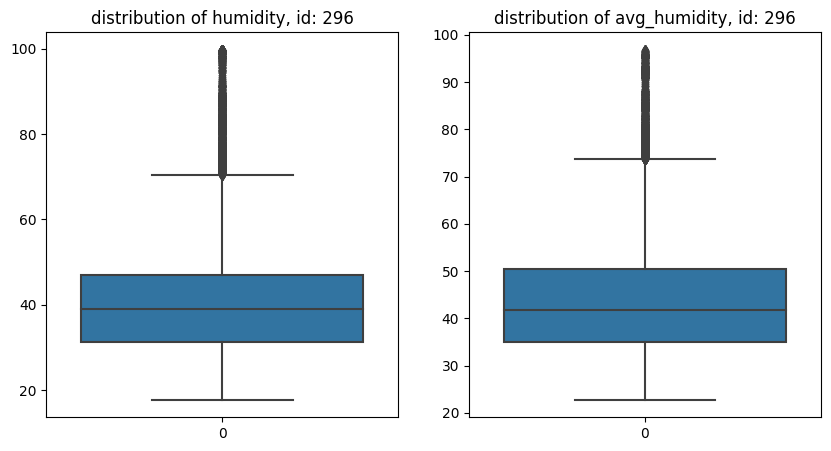

In [105]:
for _id in df_sensor['sensor_id'].unique():
    temp = df_sensor[df_sensor['sensor_id'] == _id]
    temp = temp.reset_index(drop = True)
    plt.figure(figsize=(10,5))
    plt.xticks(rotation = 45)
    # plt.plot(temp['gw_time'], temp['battery'], alpha = 1, label = 'battery')
    plt.subplot(1,2,1)
    sns.boxplot(temp['humidity'])
    plt.title('distribution of humidity, id: {}'.format(_id))
    plt.subplot(1,2,2)
    sns.boxplot(temp['avg_humidity'])
    plt.title('distribution of avg_humidity, id: {}'.format(_id))
    # plt.legend()
    plt.show()

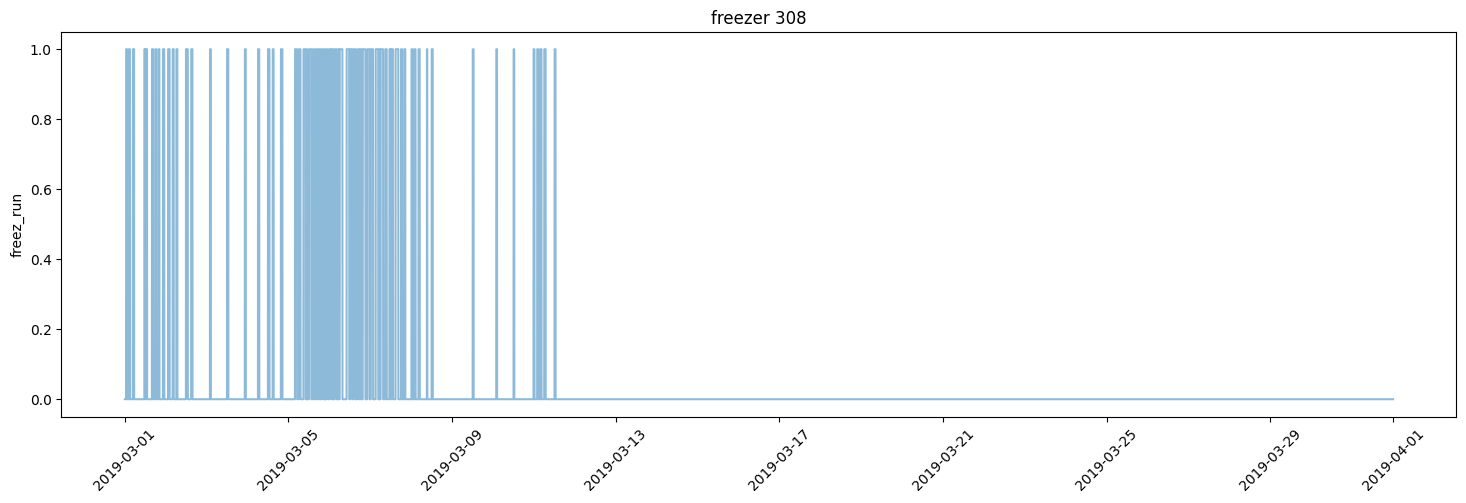

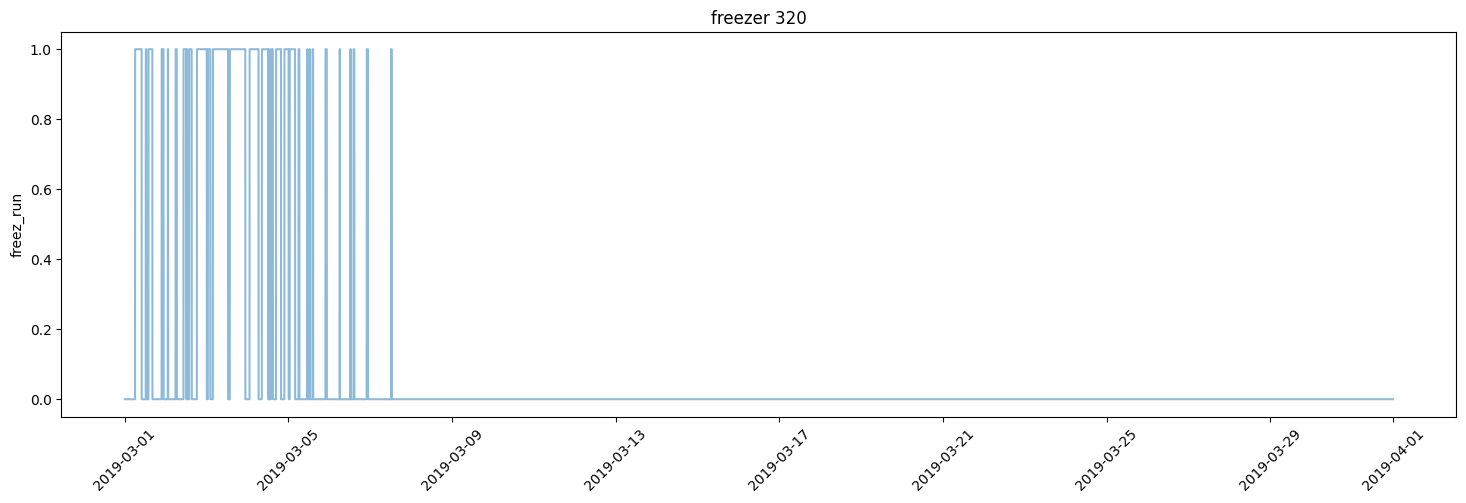

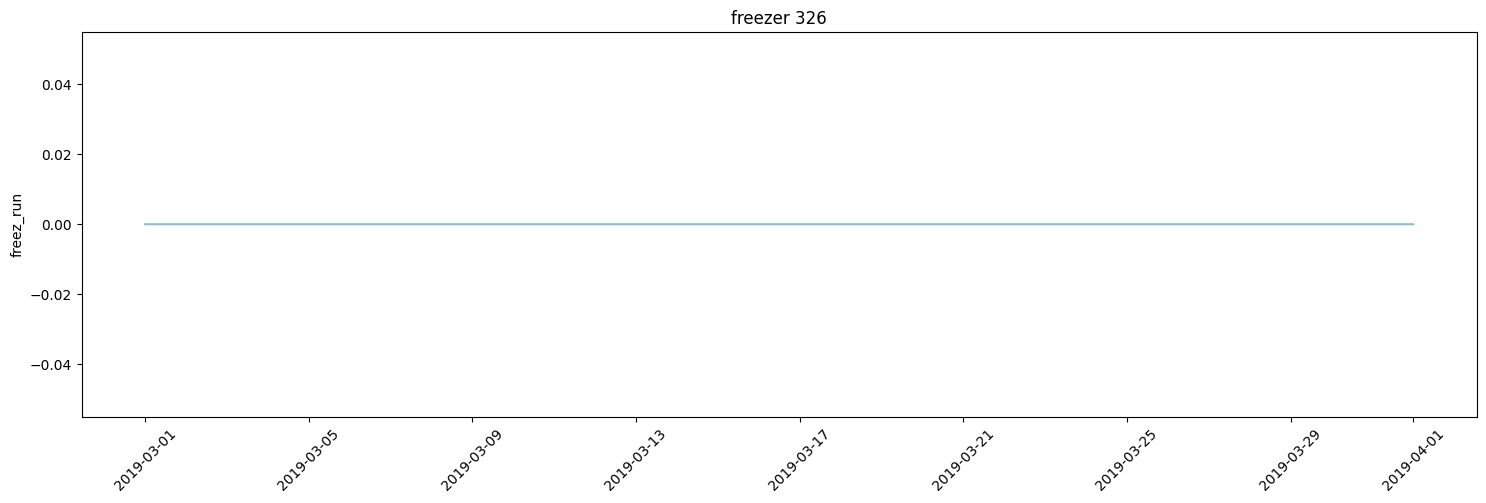

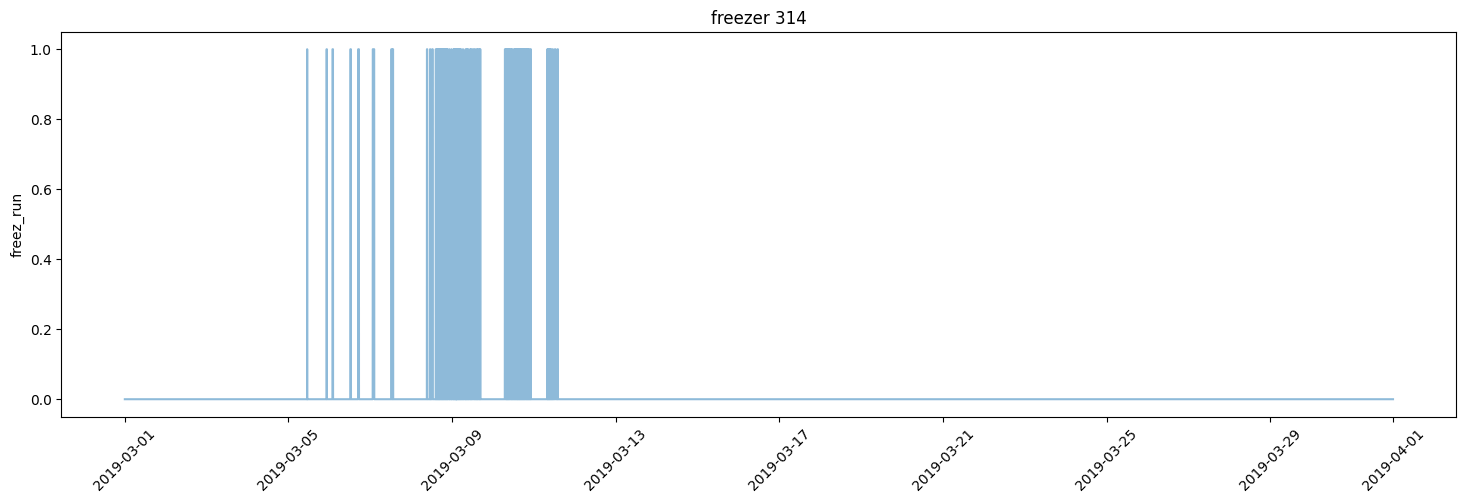

In [ ]:
for elem in df_freezer['freezer_id'].unique():
        tmp = df_freezer[df_freezer['freezer_id'] == elem]
        plt.figure(figsize=(18,5))
        plt.title('freezer {}'.format(elem))
        plt.xticks(rotation = 45)
        plt.ylabel('freez_run')
        plt.plot(tmp['gw_time'],tmp['freez_run'], alpha = 1)

In [107]:
tmp['freez_run'].count()

89527

In [108]:
# for elem in df_freezer['freezer_id'].unique():
#         tmp = df_freezer[df_freezer['freezer_id'] == elem]
#         plt.figure(figsize=(18,5))
#         plt.title('freezer {}'.format(elem))
#         plt.xticks(rotation = 45)
#         plt.ylabel('freez_run')
#         plt.plot(tmp['gw_time'],tmp['freez_run'], alpha = 1)
#         print("0: {}, 1: {}".format(tmp['freez_run'].value_counts()[0], tmp['freez_run'].count() - tmp['freez_run'].value_counts()[0]))

#         plt.show()
 

# sensor 293, freezer 314 추출

In [109]:
test_s = df_sensor[df_sensor['sensor_id']== 293]
test_f = df_freezer[df_freezer['freezer_id']==314]

In [110]:
from tqdm import tqdm

# mapping
def time_mapping(freezer, sensor):
    # 키 생성
    freezer['key'] = [x for x in range(len(freezer))]
    sensor['key'] = [None]*len(sensor)

    # type 변환
    freezer = freezer.sort_values(by = 'gw_time', ascending= True).reset_index(drop = True)
    sensor = sensor.sort_values(by = 'gw_time', ascending= True).reset_index(drop = True)

    # sorting
    freezer['gw_time'] = pd.to_datetime(freezer['gw_time'])
    sensor['gw_time'] = pd.to_datetime(sensor['gw_time'])

    for i in tqdm(range(len(freezer)-1, -1, -1)):
        sensor.loc[(sensor['gw_time'] - freezer.loc[i,'gw_time'] <= dt.timedelta(seconds = 30))&(sensor['gw_time'] - freezer.loc[i,'gw_time'] > dt.timedelta(seconds = 0)), 'key'] = freezer.loc[i,'key']
    
    return sensor

test_s = time_mapping(test_f, test_s)



C:\Users\Intellicode\AppData\Local\Temp\ipykernel_7864\562720427.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  freezer['key'] = [x for x in range(len(freezer))]
C:\Users\Intellicode\AppData\Local\Temp\ipykernel_7864\562720427.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sensor['key'] = [None]*len(sensor)
100%|██████████| 89527/89527 [07:26<00:00, 200.44it/s]


In [ ]:
# def time_mapping1(sensor, freezer):
#     for i in tqdm(range(len(freezer))):
#         _diff = sensor['gw_time'].values - np.datetime64(freezer.iloc[i]['gw_time'])
#         _filter = (_diff <= np.timedelta64(30, 's'))&(_diff > np.timedelta64(0, 's'))&(freezer.iloc[i]['delta'] >= dt.timedelta(seconds = 15))
#         sensor.loc[_filter, 'key'] = freezer.iloc[i]['key']
#     df = pd.merge(freezer, sensor, how = 'inner', on = 'key').sort_values(by = 'key')
#     col = ['key', 'gw_time_x', 'gw_time_y'] + [i for i in df.columns if i not in ['key', 'gw_time_x', 'gw_time_y']]
#     df = df[col]
#     return df

In [111]:
df = pd.merge(test_f, test_s, how = 'outer', on = 'key')
df0 = df.drop(columns = ['fan_trip','freez_trip','defrost','ctrl_operation','color_list','insert_dt_x','insert_dt_y','freezer_id','sensor_id'])
col = ['key', 'gw_time_x', 'gw_time_y'] + [i for i in df0.columns if i not in ['key', 'gw_time_x', 'gw_time_y']]
df0 = df0[col]

C:\Users\Intellicode\AppData\Local\Temp\ipykernel_7864\1847219279.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df = pd.merge(test_f, test_s, how = 'outer', on = 'key')


In [112]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df0['temperature'] = scaler.fit_transform(df0['temperature'].values.reshape(-1,1))
df0['avg_temperature'] = scaler.fit_transform(df0['avg_temperature'].values.reshape(-1,1))
df0['humidity'] = scaler.fit_transform(df0['humidity'].values.reshape(-1,1))
df0['avg_humidity'] = scaler.fit_transform(df0['avg_humidity'].values.reshape(-1,1))


In [113]:
df1 = df0.dropna()

In [114]:
from scipy import stats

print(stats.pointbiserialr(df1['fan_run'],df1['temperature']))
print(stats.pointbiserialr(df1['freez_run'],df1['temperature']))
print(stats.pointbiserialr(df1['ctrl_mode'],df1['temperature']))
print(stats.pointbiserialr(df1['operation'],df1['temperature']))
print(stats.pointbiserialr(df1['operation'],df1['temperature']))

PointbiserialrResult(correlation=-0.7384820297982057, pvalue=0.0)
PointbiserialrResult(correlation=-0.11622863287072602, pvalue=2.711354323714285e-262)
PointbiserialrResult(correlation=nan, pvalue=nan)
PointbiserialrResult(correlation=0.7176666065409631, pvalue=0.0)
PointbiserialrResult(correlation=0.7176666065409631, pvalue=0.0)


c:\project\venv\lib\site-packages\scipy\stats\_stats_py.py:4427: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


C:\Users\Intellicode\AppData\Local\Temp\ipykernel_7864\3627037836.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df0.corr(method= 'pearson')


<AxesSubplot: >

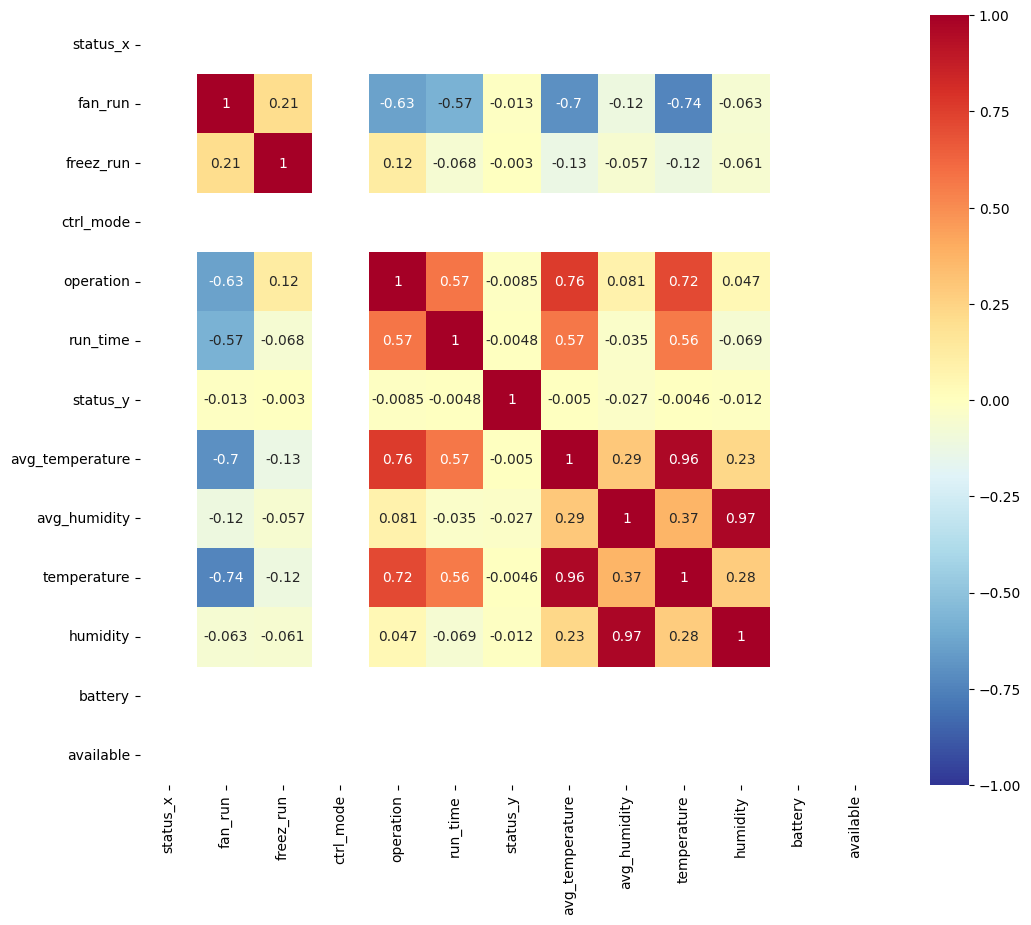

In [115]:
import seaborn as sns
df = df0.corr(method= 'pearson')
plt.figure(figsize= (12,10))
sns.heatmap(df, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )

C:\Users\Intellicode\AppData\Local\Temp\ipykernel_7864\2037606350.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df0.corr(method= 'spearman')


<AxesSubplot: >

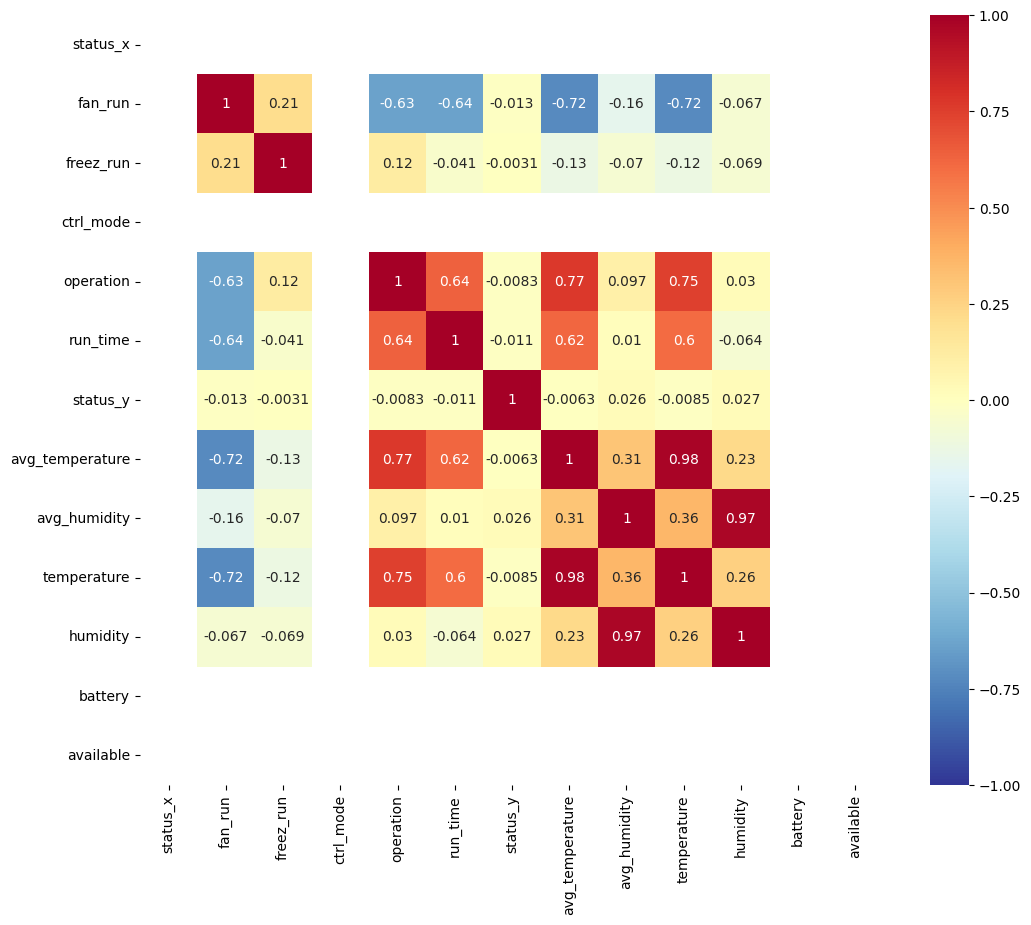

In [116]:
import seaborn as sns
df = df0.corr(method= 'spearman')
plt.figure(figsize= (12,10))
sns.heatmap(df, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )

In [117]:
df0.corr(method = 'spearman')['temperature'].sort_values()

C:\Users\Intellicode\AppData\Local\Temp\ipykernel_7864\56761950.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df0.corr(method = 'spearman')['temperature'].sort_values()


fan_run           -0.722946
freez_run         -0.122012
status_y          -0.008550
humidity           0.261439
avg_humidity       0.361591
run_time           0.604868
operation          0.747173
avg_temperature    0.983387
temperature        1.000000
status_x                NaN
ctrl_mode               NaN
battery                 NaN
available               NaN
Name: temperature, dtype: float64

In [118]:
df0.corr(method = 'pearson')['temperature'].sort_values()

C:\Users\Intellicode\AppData\Local\Temp\ipykernel_7864\2128141552.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df0.corr(method = 'pearson')['temperature'].sort_values()


fan_run           -0.738482
freez_run         -0.116229
status_y          -0.004642
humidity           0.275494
avg_humidity       0.369296
run_time           0.555140
operation          0.717667
avg_temperature    0.963148
temperature        1.000000
status_x                NaN
ctrl_mode               NaN
battery                 NaN
available               NaN
Name: temperature, dtype: float64

# sensor 293, freezer 308 추출 (센서는 같고 freezer 바꿔봄)

In [120]:
test_s = df_sensor[df_sensor['sensor_id']== 293]
test_f = df_freezer[df_freezer['freezer_id']==308]

In [121]:
from tqdm import tqdm

# mapping
def time_mapping(freezer, sensor):
    # 키 생성
    freezer['key'] = [x for x in range(len(freezer))]
    sensor['key'] = [None]*len(sensor)

    # type 변환
    freezer = freezer.sort_values(by = 'gw_time', ascending= True).reset_index(drop = True)
    sensor = sensor.sort_values(by = 'gw_time', ascending= True).reset_index(drop = True)

    # sorting
    freezer['gw_time'] = pd.to_datetime(freezer['gw_time'])
    sensor['gw_time'] = pd.to_datetime(sensor['gw_time'])

    for i in tqdm(range(len(freezer)-1, -1, -1)):
        sensor.loc[(sensor['gw_time'] - freezer.loc[i,'gw_time'] <= dt.timedelta(seconds = 30))&(sensor['gw_time'] - freezer.loc[i,'gw_time'] > dt.timedelta(seconds = 0)), 'key'] = freezer.loc[i,'key']
    
    return sensor

test_s = time_mapping(test_f, test_s)



C:\Users\Intellicode\AppData\Local\Temp\ipykernel_7864\562720427.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  freezer['key'] = [x for x in range(len(freezer))]
C:\Users\Intellicode\AppData\Local\Temp\ipykernel_7864\562720427.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sensor['key'] = [None]*len(sensor)
100%|██████████| 89527/89527 [04:53<00:00, 304.74it/s]


In [122]:
df = pd.merge(test_f, test_s, how = 'outer', on = 'key')
df0 = df.drop(columns = ['fan_trip','freez_trip','defrost','ctrl_operation','color_list','insert_dt_x','insert_dt_y','freezer_id','sensor_id'])
col = ['key', 'gw_time_x', 'gw_time_y'] + [i for i in df0.columns if i not in ['key', 'gw_time_x', 'gw_time_y']]
df0 = df0[col]

C:\Users\Intellicode\AppData\Local\Temp\ipykernel_7864\1847219279.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df = pd.merge(test_f, test_s, how = 'outer', on = 'key')


In [123]:
df0

,key,gw_time_x,gw_time_y,status_x,fan_run,freez_run,ctrl_mode,operation,run_time,status_y,avg_temperature,avg_humidity,temperature,humidity,battery,available
0,0.0,2019-03-01 00:00:06,2019-03-01 00:00:33,1.0,1.0,0.0,1.0,0.0,0.0,1.0,-4.30,39.72,-5.94,42.88,100.0,1.0
1,1.0,2019-03-01 00:00:36,2019-03-01 00:01:03,1.0,1.0,0.0,1.0,0.0,0.0,1.0,-4.30,39.72,-5.94,42.90,100.0,1.0
2,2.0,2019-03-01 00:01:06,2019-03-01 00:01:34,1.0,1.0,0.0,1.0,0.0,0.0,1.0,-4.28,39.69,-5.90,42.94,100.0,1.0
3,3.0,2019-03-01 00:01:37,2019-03-01 00:02:04,1.0,1.0,0.0,1.0,0.0,0.0,1.0,-4.28,39.70,-5.89,42.96,100.0,1.0
4,4.0,2019-03-01 00:02:07,2019-03-01 00:02:34,1.0,1.0,0.0,1.0,0.0,0.0,1.0,-4.27,39.65,-5.89,42.98,100.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90269,None,NaT,2019-03-31 15:11:23,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.50,37.76,1.21,39.23,100.0,1.0
90270,None,NaT,2019-03-31 15:15:54,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.52,37.90,1.25,39.30,100.0,1.0
90271,None,NaT,2019-03-31 18:05:48,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.58,36.71,2.53,37.14,100.0,1.0
90272,None,NaT,2019-03-31 18:07:49,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.59,36.61,2.53,36.95,100.0,1.0


In [124]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df0['temperature'] = scaler.fit_transform(df0['temperature'].values.reshape(-1,1))
df0['avg_temperature'] = scaler.fit_transform(df0['avg_temperature'].values.reshape(-1,1))
df0['humidity'] = scaler.fit_transform(df0['humidity'].values.reshape(-1,1))
df0['avg_humidity'] = scaler.fit_transform(df0['avg_humidity'].values.reshape(-1,1))


C:\Users\Intellicode\AppData\Local\Temp\ipykernel_7864\3627037836.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df0.corr(method= 'pearson')


<AxesSubplot: >

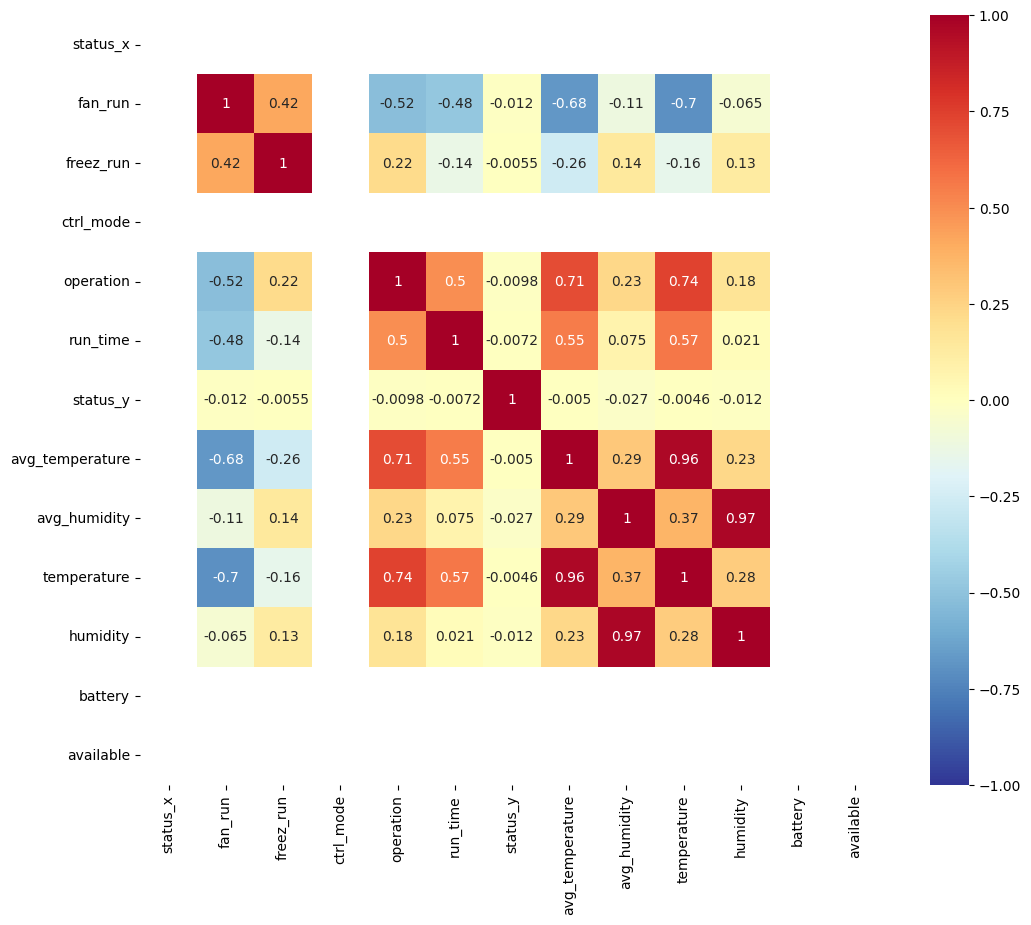

In [125]:
import seaborn as sns
df = df0.corr(method= 'pearson')
plt.figure(figsize= (12,10))
sns.heatmap(df, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )

In [126]:
sensor_pos = {
    "290": {"x": 2, "y": 3},
    "293": {"x": 5, "y": 3},
    "296": {"x": 3, "y": 8},
    "299": {"x": 4, "y": 14},
    "302": {"x": 4, "y": 5}
}
freezer_pos = {
    "308": {"x": 2, "y": 1},
    "314": {"x": 6, "y": 1},
    "320": {"x": 8, "y": 10},
    "326": {"x": 4, "y": 17}
}

sensor_pos = pd.DataFrame(sensor_pos).T
freezer_pos = pd.DataFrame(freezer_pos).T

sensor_pos = sensor_pos.reset_index()
freezer_pos = freezer_pos.reset_index()
pos = pd.concat([sensor_pos,freezer_pos])


Text(6, 4, '314(freezer)')

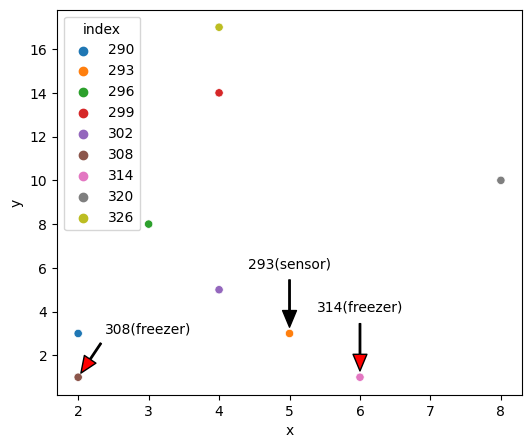

In [128]:
plt.figure(figsize = (6,5))
sns.scatterplot(x = 'x', y = 'y', data = pos, hue = 'index')
plt.annotate('293(sensor)', xy=(5, 3), xytext=(5,6),
            fontsize=10, ha='center',
            arrowprops=dict(facecolor='black', width=1, shrink=0.1, headwidth=10))

plt.annotate('308(freezer)', xy=(2, 1), xytext=(3,3),
            fontsize=10, ha='center',
            arrowprops=dict(facecolor='red', width=1, shrink=0.1, headwidth=10))

plt.annotate('314(freezer)', xy=(6, 1), xytext=(6,4),
            fontsize=10, ha='center',
            arrowprops=dict(facecolor='red', width=1, shrink=0.1, headwidth=10))
        

In [129]:
se

NameError: name 'se' is not defined